# Recursion

## Sum

Let's say we want to define a function called `sumto`:

$ sumto(x) = \sum_{i=1}^{i=x}{i}$

$ sumto(4) = 4 + 3 + 2 + 1$

$ sumto(3) = 3 + 2 + 1$

We could define this algorithm in terms of itself:

$ sumto(4) = 4 + sumto(3) $

$ sumto(x) = x + sumto(x-1) $

The concept of defining a process in terms of itself is called **recursion**.

In [ ]:
! mkdir -p for_class

```c++
int sumto(int x) {
    return x + sumto(x - 1);
}
```

In [ ]:
%%file for_class/sumto.cpp
#include <iostream>
using std::cout;
using std::endl;

int sumto(int x) {
    return x + sumto(x-1);
}

int main(int argc, char* argv[]) {
    cout << sumto(atoi(argv[0])) << endl;
}

### `sumto.cpp`

```bash
g++ -o sumto sumto.cpp && ./sumto 7
```

- Segfault
- Add print statements


<div class='big centered'> 😱 </div>

```bash
g++ -o sumto main.cpp && ./sumto 7
```

What happened!?

## Rule of Recursion #1

> **A recursive function MUST provide a base case**

A base case is the condition in which the recursive function no longer recurses.

What is the base case for `sumto`?

```c++
int sumto(int x) {
    if (x == 1) {
        return 1;
    } else {
        return x + sumto(x-1);
    }
}
```

```bash
g++ -o sumto main.cpp && ./sumto 7
```

```bash
g++ -o sumto main.cpp && ./sumto -1
```

## Rule of Recursion #2

> **A recursive function MUST progress towards the base case**

If each recursive call takes the execution further from the base case, it will never reach the base case!

```c++
int sumto(int x) {
    if (x < 0) {
        return x + sumto(x+1);
    }
    else if (x == 1) {
        return 1;
    } else {
        return x + sumto(x-1);
    }
}
```

```bash
g++ -o sumto main.cpp && ./sumto -1
```

## Activity

Please work with a partner.

Show what happens when `sumto` is called with a value of `4`?

- List all the calls and returns of `sumto` in the order they occur.
- For each call give the value passed into the function.
- For each return give the value returned from the function.

- How many copies of `x` exist when `sumto(1)` is executing?

```c++
int sumto(int x) {
    if (x == 1) {
        return 1;
    } else {
        return x + sumto(x-1);
    }
}
```

| x | sumto(x-1) | return |
|---|------------|--------|
| 4 | ...        | ...    |
| 3 | ...        | ...    |
| 2 | 1          | ...    |
| 1 | nope       | 1      |


| x | sumto(x-1) | return |
|---|------------|--------|
| 4 | 6          | 10     |
| 3 | 3          | 6      |
| 2 | 1          | 3      |
| 1 | nope       | 1      |


## Thinking about recursion

- What's the best way to think about recursive methods?
- How can you feel confident that a recursive method works correctly?
  - Can you step through every recursive call of every use-case?
  - Can you step through `sumto(100000)`?

## Induction

1. Show that the base case is correct
2. Show that if it works correctly for $k$, then it will work correctly for $k+1$

| x | sumto(x-1) | return |
|---|------------|--------|
| 4 | ...        | ...    |
| 3 | ...        | ...    |
| 2 | 1          | ...    |
| 1 | nope       | 1      |


```c++
int sumto(int x) {
    if (x == 0) {
        return 0;
    } else {
        return x + sumto(x-1);
    }
}
```

1. What is the base case? Is it correct? (Assuming positive inputs)

2. If `sumto(k-1)` is correct, will `sumto(k)` be correct?

## Rule of Recursion #3

> **Trust the induction**

Assume that the recursive call worked and then solve the $k \rightarrow k+1$ problem.

### Deriving `sumto` with recursion

0. Define the problem recursively

    $ sumto(x) = x + sumto(x-1) $

1. What is the base case?

    $$ sumto(x)=   \left\{
    \begin{array}{ll}
          x = 0 & 0 \\
          x > 0 & x + sumto(x-1)
    \end{array} 
    \right.  $$

2. Does the recursive step move towards the base case?

    $x$ must be greater or equal to $0$. If $x = 0$, we are at the base case. If $x > 0$, we make $x$ smaller, moving towards $x = 0$.

3. Trust the induction
    
    Assuming $sumto(x-1)$ returns the correct answer, do we correctly return the value for $sumto(x)$?
    

## When to use recursion

- Sum can be implemented using recursion or using a loop (iteration).
- Which is the better way to write sum?

- Do problems exist that are more naturally recursive?

## Activity

Please work with a partner.

Define a recursive algorithm (in psuedo-code) for printing all the files and folders on your computer.

```c++
void print_files(string path) {
    for (string file_path : list_files(path)) {
        cout << file_path << endl;
    }
    for (string folder_path : list_folders(path)) {
        cout << folder_path << endl;
        print_files(folder_path);
    }
}
```

- What is the base case?
- Where is the recursion?
- Does the recursion progress towards the base case?
- If `print_files(child_folder)` is correct, will `print_files(parent_folder)` work correctly?
  - Is the $k \rightarrow k+1$ logic correct?

## Activity

Please work with a partner.

Define a recursive algorithm (in pseudo-code) for printing all permutations of the characters in a string.

For example, the permutations of `"ABC"` are: `"ABC", "ACB", "BAC", "BCA", "CAB", "CBA"`

0. What is the recursive relationship?
    For a set of characters $C$:
    
    $$perm(S) = s + perm(S - s)  \forall s \in S$$
   
    I.E.:
    ```
    perm(ABC) = A + perm(BC), B + perm(AC), C + perm(AB)
       => ABC, ACB, B + perm(AC)...
    
    perm(BC) = B + perm(C), C + perm(B) => BC, CB
    
    perm(C) = C
    
    perm(B) = B
    ```

1. What is the base case?

    $S$ is empty. OR, $S$ has one element (return that one element)
    
    

2. Does the recursion progress towards the base case?

    Each time we subtract $s$ from $S$, so yes, we are moving towards $S$ being empty.
    
 

3. Trust the induction

    If $perm(S-s)$ is correct, will $perm(S)$ be correct?
    
    Assuming we will print out all permutations of the remaining characters, then for each $s \in S$, we'll get each character followed by all permutations of the other characters, which gives us all permutations of all the characters. ✅

What does this look like in code?

### `perms.cpp`

In [ ]:
%%file for_class/perms.cpp
#include <iostream>
#include <string>
#include <vector>
using namespace std;

void print(vector<string> words) {
    for (string word : words) {
        cout << word << endl;
    }
}

vector<string> get_perms(string letters) {
    vector<string> perms;
    if (letters.length() == 1) {
        perms.push_back(letters);
        
    } else {
        for (int i = 0; i < letters.length(); i++) {
            char c = letters[i];
            string not_c = letters.substr(0, i) + letters.substr(i + 1);
            for (string sub_perm: get_perms(not_c)) {
                perms.push_back(c + sub_perm);
            }
        }
    }
    cout << "Letters are: " << letters << endl;
    print(perms);
    return perms;
}

int main(int argc, char* argv[]) {
    print(get_perms(argv[1]));
}


```bash
g++ -o perms perms.cpp && ./perms ABC
```

## When should you use recursion?

- Recursive data
  - File system (folders contain folders)
  - Arithmetic expressions (expressions contain expressions)
  - Programming languages (statements contain statements)
  
- Divide and conquer
  - Solve a problem by dividing it into smaller problems of the same kind
  
- Backtracking
  - Permutations
  - Boggle
  - Chess move exploration
  
  

## Deep recursion

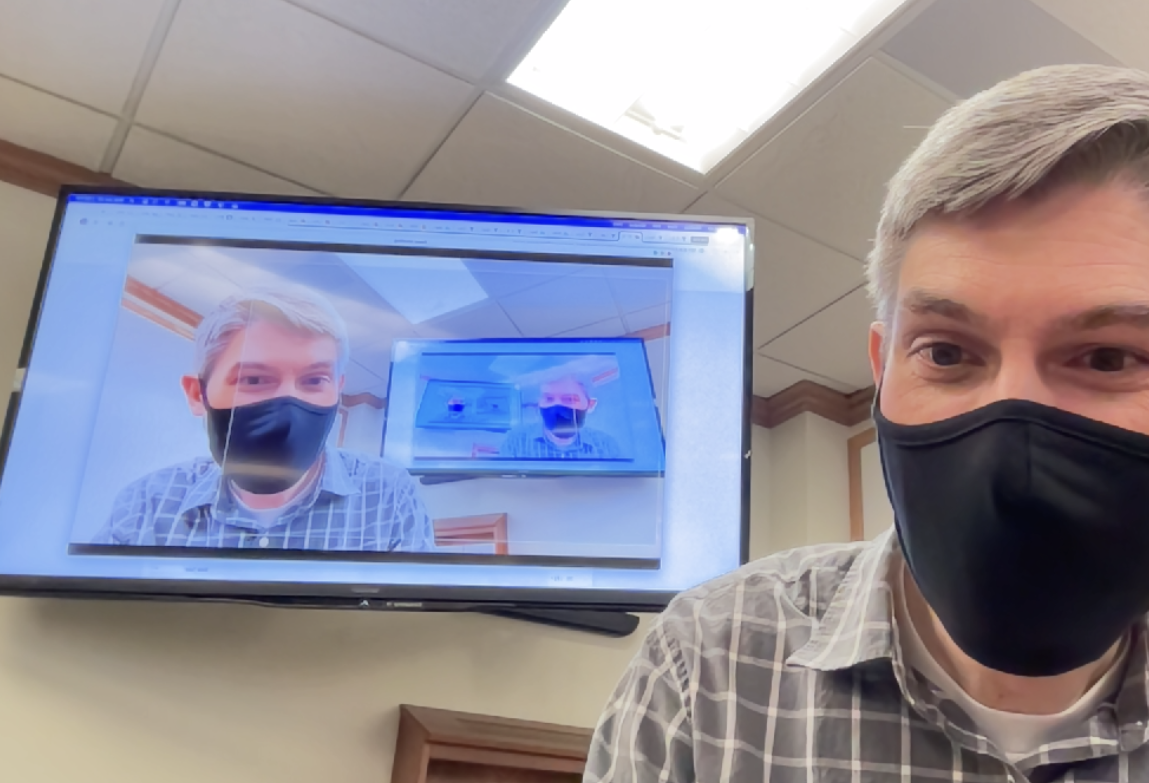

```c++
int sumto(int x) {
    if (x == 1) {
        return 1;
    } else {
        return x + sumto(x-1);
    }
}
```

What happens when you run `sumto(1000000)`?

```bash
g++ -o sumto sumto.cpp && ./sumto 10000000
```

What is happening?

With each function call, the program puts another frame on the stack. 

Eventually, the stack runs out of room!

We call this a **stack overflow**.

## Rule of Recursion #4

> **Make sure that the number of recursive calls will be reasonable**


## Excessive recursion

Fibonacci was an important mathematician.

Among his many contributions, he defined the *fibonacci sequence*: each value is the sum of the previous two values; the first two values are 0 and 1.

0, 1, 1, 2, 3, 5, 8, 13, ... 

$$ 
fib(n)=   \left\{
    \begin{array}{ll}
          n = 0  & 0 \\
          n = 1  & 1 \\
          n > 1  & fib(n-1) + fib(n-2)
    \end{array} 
    \right.  
$$

In [1]:
int fib(int n) {
    if (n==0) { 
        return 0; 
    }
    if (n==1) { 
        return 1; 
    }
    return fib(n-1) + fib(n-2);
}

In [ ]:
int fib(int n) {
    if (n == 0) {
        return 0;
    } else if (n == 1) {
        return 1;
    } else {
        return fib(n - 1) + fib(n - 2);
    }
}

In [2]:
fib(10)

55

In [3]:
fib(40)

102334155

In [4]:
%%timeit
fib(10);

268 ns +- 1.56 ns per loop (mean +- std. dev. of 7 runs 1000000 loops each)


In [5]:
%%timeit
fib(40);

503 ms +- 9.1 ms per loop (mean +- std. dev. of 7 runs 1 loop each)


4x larger and 2,000,000x slower!?

What is going on?

```
fib(5) = fib(4) + fib(3)
    fib(4) = fib(3) + fib(2)
        fib(3) = fib(2) + fib(1)
            fib(2) = fib(1) + fib(0)
                fib(1) = 1
                fib(0) = 0
            fib(1) = 1
        fib(2) = fib(1) + fib(0)
            fib(1) = 1
            fib(0) = 0
    fib(3) = fib(2) + fib(1)
        fib(2) = fib(1) + fib(0)
            fib(1) = 1
            fib(0) = 0
        fib(1) = 1
```

How many times do `fib(1)` and `fib(0)` get called?

## Rule of Recursion #5

> **Never solve the same sub-problem more than once**

If the recursive solution has you calling the same function with the same arguments multiple times, you're actually generating more work than you need and will run into trouble.

In such scenarios, some form of **caching** (or storing the result for a specific input) might be helpful.

This is one of the defining characteristics of **dynamic programming** (more on this in CS 312).

In [6]:
#include <unordered_map>
using namespace std;

In [7]:
class Fibber {
    private:
    unordered_map<int, int> fibs;
    
    public:
    Fibber() {
        fibs[0] = 0;
        fibs[1] = 1;
    }
    
    int fib(int n) {
        if (n < 0) { throw std::invalid_argument("n must be >= 0"); }
        
        unordered_map<int, int>::iterator answer = fibs.find(n);
        if (answer != fibs.end()) {
            // We've already computed this fib, so just return it
            return answer->second;
            
        } else {
            // We haven't computed this fib before, 
            //  so do that and store the result before returning
            return (fibs[n] = fib(n-1) + fib(n-2));
        }
    }
};

In [8]:
Fibber fibber;

In [9]:
fibber.fib(10)

55

In [10]:
fibber.fib(40)

102334155

In [11]:
%%timeit
fibber.fib(40);

53.4 ns +- 0.0856 ns per loop (mean +- std. dev. of 7 runs 10000000 loops each)


In [12]:
%%timeit
fibber.fib(100);

54.2 ns +- 0.0602 ns per loop (mean +- std. dev. of 7 runs 10000000 loops each)


## Recursion

0. Identify the recursive relationship
1. Define the base case
2. Ensure the recursion progresses towards the base case
3. Trust the induction
4. Watch out for deep recursion
5. Don't compute the same stuff more than once


- Any problem that can be solved with recursive function calls can be solved iteratively
  - You may need a stack
- However, recursive calls can provide an intuitive, simple solution to many problems
- Just remember that recursive calls can run into computational limits with some problems
  - Stack overflow
  - Excessive duplicate work
- **But regardless of the implementation (iteration vs recursive function calls), being able to identify and solve problems with a recursive nature is critical skill for programmers**

**Learn to trust the process of induction.** 
- Base case
- Inductive step: $ k \rightarrow k+1 $

## Binary search

Assume I have a sorted list. How can I find an item in the list?

```
1 2 4 4 7 9 10 14 18 20
```

If I want to know whether 7 is in my list, I could:

- Start at the beginning and march through each item
- OR...

- Take the middle value: `10 / 2 = 5 => 9`
- Is 7 bigger or smaller than 9?
  - Smaller
- Using the first half of the list: `1 2 4 4 7`
  - Take the middle value: `5 / 2 = 2 => 4`
  - Is 7 bigger or smaller than 4?
    - Bigger
  - Using the second half of the list: `4 7`
    - Take the middle value: `1 / 2 = 1 => 7`
    - Is 7 bigger or smaller than 7?
      - Same!
      - Return `true`

Do you see the recursion?

At each step, what happened to the size of the list?

If I have a list of size $n$, how many times can I cut the list in half before I have a list of size $1$?

### Aside: Solving Fibonacci Iteratively

In [13]:
int fib_iterative(int n) {
    if (n == 0) { return 0; }
    if (n == 1) { return 1; }

    int prev2 = 0;
    int prev1 = 1;
    int current;
    for (int i = 2; i <=n; i++) {
        current = prev2 + prev1;
        prev2 = prev1;
        prev1 = current;
    }
    return current;
}

In [14]:
fib_iterative(10)

55

In [15]:
fib_iterative(40)

102334155

In [16]:
%%timeit
fib_iterative(10);

25.8 ns +- 0.151 ns per loop (mean +- std. dev. of 7 runs 10000000 loops each)


In [17]:
%%timeit
fib_iterative(40);

111 ns +- 0.316 ns per loop (mean +- std. dev. of 7 runs 10000000 loops each)


There are several principles at play when considering the fibonacci computation:

- Some form of caching is needed or the duplicated work explodes
- Tracking the last two numbers computed is simple and fast, but doesn't remember results from previous runs.
  - If you only need one fibonacci number, that might be just fine
- Tracking all previous results speeds up future computation, but you need to keep previous results around
  - For the fibonacci sequence, that might not be too bad as it's just a linear array/map under the hood
  - For other problems, keep all previous results around might be harder to do


### Just for Fun: Skin the Cat...One More TIME! 🙀

Let's cache the results in a vector for maximum performance!

In [18]:
using namespace std;

In [19]:
#include <vector>

In [20]:
class FastFibber {
    private:
    vector<unsigned long> fibs;
    public:
    FastFibber() {
        fibs.push_back(0);
        fibs.push_back(1);
    }
    
    unsigned long fib(unsigned int n) {
        if (n >= fibs.size()) {
            for (int i = fibs.size(); i <= n; i++) {
                fibs.push_back(fibs[i-1] + fibs[i-2]);
            }
        }
        
        return fibs[n];
    }
};

In [21]:
FastFibber fast;

In [22]:
fast.fib(10)

55

In [23]:
fast.fib(40)

102334155

In [24]:
%%timeit
fast.fib(100);

3.14 ns +- 0.0161 ns per loop (mean +- std. dev. of 7 runs 100000000 loops each)


You'll notice that we used `unsigned long` instead of `int`. That's because `fib(100)` returns a number SO BIG that `int` can't store it properly, and the result is surprising.

In [25]:
(int)(fast.fib(100))

-980107325

In [26]:
fast.fib(200)

17323038258947941269

We can't solve the fibonacci sequence much father than the 200th value with our `FastFibber` because we're approaching the maximum value an `unsigned long` can hold:

In [27]:
std::numeric_limits<unsigned long>::max()

18446744073709551615